# Project Concrete 

_Project Concrete_ aims to correlate, visualize and predict real estate prices based on the relationship between various
factors such as unemployment rate, disposable income and population growth in Austria.


Data Sources used for this endeavour - All datapoints are given for each district of Vienna
- [Unemployment Rates (Source: data.gv.at)](https://www.data.gv.at/katalog/dataset/CFE2FF7E9AD53C1EE053C630070AB105)
- [Net Income Vienna (Source: wien.gv.at)](https://www.wien.gv.at/statistik/bezirke/)
- [Population Growth (Source: wien.gv.at)](https://www.wien.gv.at/statistik/bevoelkerung/bevoelkerungsstand/index.html)
- [Real Estate Prices Vienna (Source: data.gv.at)](https://www.data.gv.at/katalog/dataset/kaufpreissammlung-liegenschaften-wien/resource/7b9bdd2d-2ff0-4e6e-bba5-21483d8cf55b)


Planned execution steps:
- Data aggregation and collection (see Planned Data Sources)
- Data preperation and import into MongoDB
- Analysis of data via Jupyter Notebook and MapReduce
- Presentation and visualization of results (i.e. map of Austria/Vienna, etc.)


### Install pymongo

In [157]:
!pip install pymongo
!pip install matplotlib
!pip install numpy
!pip install seaborn

### Connect to DB via connection string

In [241]:
import warnings
import pymongo
from pymongo import MongoClient
import pandas as pd

warnings.filterwarnings('ignore')

# Provide the mongodb atlas url to connect python to mongodb using pymongo
CONNECTION_STRING = "mongodb://127.0.0.1:27017"

# Create a connection using MongoClient
myclient = MongoClient(CONNECTION_STRING)

print("Connection Successful")

# Check DB 
for db in myclient.list_databases():
    print(db)

Connection Successful
{'name': 'admin', 'sizeOnDisk': 40960, 'empty': False}
{'name': 'config', 'sizeOnDisk': 98304, 'empty': False}
{'name': 'immodb', 'sizeOnDisk': 10588160, 'empty': False}
{'name': 'local', 'sizeOnDisk': 73728, 'empty': False}


In [103]:
# Import Unemployment Data CSV from 2002
unemploy_df = pd.read_csv('emp-bez-alp.csv', sep = ";", decimal=',')
unemploy_df

,NUTS1,NUTS2,NUTS3,DISTRICT_CODE,SUB_DISTRICT_CODE,REF_DATE,REF_YEAR,ALP_TOT_VALUE,ALP_MAL_VALUE,ALP_FEM_VALUE,ALP_TOT_DENSITY,ALP_MAL_DENSITY,ALP_FEM_DENSITY
0,AT1,AT13,AT130,90000,90000,20020101,2002,74.894,44.966,29.928,68.5,83.5,54.0
1,AT1,AT13,AT130,90100,90100,20020101,2002,433,232,201,35.4,19.0,16.5
2,AT1,AT13,AT130,90200,90200,20020101,2002,4.784,2.933,1.851,77.7,47.6,30.1
3,AT1,AT13,AT130,90300,90300,20020101,2002,3.957,2.403,1.554,68.7,41.7,27.0
4,AT1,AT13,AT130,90400,90400,20020101,2002,1.140,668,472,56.6,33.1,23.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,AT1,AT13,AT130,91900,91900,20190101,2019,3.850,2.091,1.759,82.6,44.9,37.8
428,AT1,AT13,AT130,92000,92000,20190101,2019,8.750,4.976,3.774,143.9,81.8,62.1
429,AT1,AT13,AT130,92100,92100,20190101,2019,12.823,6.943,5.880,115.6,62.6,53.0
430,AT1,AT13,AT130,92200,92200,20190101,2019,11.762,6.006,5.756,90.6,46.2,44.3


In [105]:
# Import Population Growth Data in Vienna from 2002
pop_growth_df = pd.read_csv('tab_5.1.2_bevoelkerungsstandund-veraenderung_.csv', sep = ";", decimal='.', encoding='utf-8')
pop_growth_df

,Jahr,Wien,1. Innere Stadt,2. Leopoldstadt,3. Landstrasse,4. Wieden,5. Margareten,6. Mariahilf,7. Neubau,8. Josefstadt,...,14. Penzing,15. Rudolfsheim-Fuenfhaus,16. Ottakring,17. Hernals,18. Waehring,19. Doebling,20. Brigittenau,21. Floridsdorf,22. Donaustadt,23. Liesing
0,2002,1571123,17630,89016,82227,28975,49785,28525,28912,22219,...,79142,67482,87914,48827,45505,65327,76837,129726,138100,85791
1,2003,1592846,17541,89954,82297,29348,50367,28805,28968,23156,...,80185,67976,89153,49428,45872,66017,78792,131892,140404,86486
2,2004,1610410,17384,90837,83019,29394,51098,28891,29012,23309,...,80505,68760,89822,50278,46309,66437,79441,133801,142620,87080
3,2005,1632569,17294,91364,83827,29573,51882,29012,29161,23588,...,81785,69467,91997,51316,46921,66900,80758,134904,144820,87716
4,2006,1652449,17285,92170,84208,30126,52534,29369,30416,23597,...,82829,70235,93817,52480,47291,67389,81288,136625,146892,89078
5,2007,1661246,17147,93313,83919,30189,52286,29463,29955,23613,...,83246,70228,93877,52626,47333,67832,81719,137335,149083,90291
6,2008,1671221,16976,93463,83050,30262,52434,29430,30054,23703,...,83751,70291,94193,52414,47478,67961,81648,138678,150967,91192
7,2009,1680135,16623,93822,82979,30348,52288,29197,29878,23639,...,83980,70600,94526,52253,47619,67837,81986,139498,153148,91623
8,2010,1689995,16525,94735,83061,30331,52354,29323,30069,23435,...,84090,70830,94816,52328,47693,67865,82083,140647,155527,92252
9,2011,1702855,16385,95302,83955,30541,52753,29308,30062,23379,...,84566,71491,94951,52293,47575,68079,82969,142199,158417,93374


In [106]:
# Import Real Estate Purchase list from 1990 (Kaufpreissammlung Liegenschaften Wien)
real_estate_vienna_df = pd.read_csv('kaufpreissammlung-liegenschaften.csv', sep = ";", decimal=',', encoding='latin-1', low_memory=False)
real_estate_vienna_df

,KG.Code,Katastralgemeinde,EZ,PLZ,Straße,ON,Gst.,Gst.Fl.,ErwArt,Erwerbsdatum,...,Baureifgest,% Widmung,Baurecht,Bis,auf EZ,Stammeinlage,sonst_wid,sonst_wid_prz,ber. Kaufpreis,Bauzins
0,1617,Strebersdorf,1417.0,1210.0,Mühlweg,13,752/16,755.0,Kaufvertrag,13.10.2021,...,FALSCH,100.0,FALSCH,NaN,NaN,FALSCH,NaN,NaN,750000.0,NaN
1,1607,Groß Jedlersdorf II,193.0,1210.0,Bahnsteggasse,4,408,510.0,Kaufvertrag,13.09.2021,...,FALSCH,100.0,FALSCH,NaN,NaN,FALSCH,NaN,NaN,1250000.0,NaN
2,1209,Ober St.Veit,3570.0,1130.0,Jennerplatz,34/20,938/3,456.0,Kaufvertrag,10.08.2021,...,FALSCH,100.0,FALSCH,NaN,NaN,FALSCH,NaN,NaN,480000.0,NaN
3,1207,Lainz,405.0,1130.0,Sebastian-Brunner-Gasse,6,8/23,523.0,Kaufvertrag,30.12.2020,...,FALSCH,100.0,FALSCH,NaN,NaN,FALSCH,NaN,NaN,1600000.0,NaN
4,1101,Favoriten,3831.0,1100.0,Laxenburger Straße,2C -2 D,2044/19,12768.0,Kaufvertrag,04.11.2020,...,FALSCH,30.0,FALSCH,NaN,NaN,FALSCH,"W V 22 g , Wi g","40 ,30",15000000.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57907,1204,Hadersdorf,1057.0,1140.0,Laskywiesengasse,10,889,1313.0,Kaufvertrag,18.08.2021,...,FALSCH,100.0,FALSCH,NaN,NaN,FALSCH,NaN,NaN,950000.0,NaN
57908,1204,Hadersdorf,1200.0,1140.0,Robert-Fuchs-Gasse,25-31,448,4003.0,Kaufvertrag,05.12.2018,...,FALSCH,100.0,FALSCH,NaN,NaN,FALSCH,NaN,NaN,5200000.0,NaN
57909,1206,Hütteldorf,2760.0,1140.0,Ulmenstraße,48,1232/1,499.0,Kaufvertrag,15.06.2021,...,FALSCH,100.0,FALSCH,NaN,NaN,FALSCH,NaN,NaN,699000.0,NaN
57910,1216,Weidlingau,5.0,1140.0,Hauptstraße,114,11/2,1649.0,Kaufvertrag,26.07.2021,...,FALSCH,100.0,FALSCH,NaN,NaN,FALSCH,NaN,NaN,1496000.0,NaN


In [57]:
# Import Net Income Data in Vienna from 2002
net_income_vienna_df = pd.read_csv('vie-bez-biz-ecn-inc-sex-2002f.csv', sep=';', decimal=',')
net_income_vienna_df

,NUTS,DISTRICT_CODE,SUB_DISTRICT_CODE,REF_YEAR,REF_DATE,INC_TOT_VALUE,INC_MAL_VALUE,INC_FEM_VALUE
0,AT13,90000,90000,2002,20021231,18.217,20.709,15.424
1,AT13,90100,90100,2002,20021231,25.463,31.961,18.536
2,AT13,90200,90200,2002,20021231,16.439,18.301,14.282
3,AT13,90300,90300,2002,20021231,18.701,21.444,15.804
4,AT13,90400,90400,2002,20021231,20.325,23.641,16.876
...,...,...,...,...,...,...,...,...
451,AT13,91900,91900,2020,20201231,29.195,34.102,24.257
452,AT13,92000,92000,2020,20201231,20.671,21.591,19.531
453,AT13,92100,92100,2020,20201231,24.061,26.202,21.693
454,AT13,92200,92200,2020,20201231,26.272,29.302,23.100


### Create collection
Loading dataframes into database

In [109]:
# In MongoDB collections and DBs are only created on first insert (reminiscent of Git folders)
db = myclient["immodb"]

# We insert the whole dateframes into the DB

# Insert unemploymentData
db.unemploymentData.insert_many(unemploy_df.to_dict('records'))
# Insert populationGrowth
db.populationGrowth.insert_many(pop_growth_df.to_dict('records'))
# Insert realEstateVienna
db.realEstateVienna.insert_many(real_estate_vienna_df.to_dict('records'))
# Insert netIncomeVienna
db.netIncomeVienna.insert_many(net_income_vienna_df.to_dict('records'))

# Check if colletions have been created
print(db.list_collection_names())

['netIncomeVienna', 'unemploymentData', 'realEstateVienna', 'populationGrowth']


In [110]:
# Check if collections have data

unemp_col = db["unemploymentData"]
populationGrowth_col = db["populationGrowth"]
realEstateVienna_col = db["realEstateVienna"]
netIncomeVienna_col = db["netIncomeVienna"]

data = [(unemp_col.find(), 'Unemployment Data'), (populationGrowth_col.find(), 'Population Growth'), (realEstateVienna_col.find(), 'Real Estate Sales'), (netIncomeVienna_col.find(), 'Net Income')]
for (cur, title) in data:
    print(title, '\nRow Count: ', len(list(cur)))

Unemployment Data 
Row Count:  432
Population Growth 
Row Count:  19
Real Estate Sales 
Row Count:  57912
Net Income 
Row Count:  456


In [108]:
# Drop all collections
# db["unemploymentData"].drop()
# db["populationGrowth"].drop()
# db["realEstateVienna"].drop()
# db["netIncomeVienna"].drop()

### Load from database
Build new dataframe by reading from database

In [75]:
# Unemployment Data 
unemployment_fromDb = pd.DataFrame(list(unemp_col.find()))
unemployment_fromDb = unemployment_fromDb.set_index("_id")
unemployment_fromDb

,NUTS1,NUTS2,NUTS3,DISTRICT_CODE,SUB_DISTRICT_CODE,REF_DATE,REF_YEAR,ALP_TOT_VALUE,ALP_MAL_VALUE,ALP_FEM_VALUE,ALP_TOT_DENSITY,ALP_MAL_DENSITY,ALP_FEM_DENSITY
_id,,,,,,,,,,,,,
62655b9a29ccfd877bef3bfb,AT1,AT13,AT130,90000,90000,20020101,2002,74.894,44.966,29.928,68.5,83.5,54.0
62655b9a29ccfd877bef3bfc,AT1,AT13,AT130,90100,90100,20020101,2002,433,232,201,35.4,19.0,16.5
62655b9a29ccfd877bef3bfd,AT1,AT13,AT130,90200,90200,20020101,2002,4.784,2.933,1.851,77.7,47.6,30.1
62655b9a29ccfd877bef3bfe,AT1,AT13,AT130,90300,90300,20020101,2002,3.957,2.403,1.554,68.7,41.7,27.0
62655b9a29ccfd877bef3bff,AT1,AT13,AT130,90400,90400,20020101,2002,1.140,668,472,56.6,33.1,23.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62655b9a29ccfd877bef3da6,AT1,AT13,AT130,91900,91900,20190101,2019,3.850,2.091,1.759,82.6,44.9,37.8
62655b9a29ccfd877bef3da7,AT1,AT13,AT130,92000,92000,20190101,2019,8.750,4.976,3.774,143.9,81.8,62.1
62655b9a29ccfd877bef3da8,AT1,AT13,AT130,92100,92100,20190101,2019,12.823,6.943,5.880,115.6,62.6,53.0


In [111]:
# Population Growth in Vienna
populationGrowth_fromDb = pd.DataFrame(list(populationGrowth_col.find()))
populationGrowth_fromDb = populationGrowth_fromDb.set_index("_id")
populationGrowth_fromDb

,Jahr,Wien,1. Innere Stadt,2. Leopoldstadt,3. Landstrasse,4. Wieden,5. Margareten,6. Mariahilf,7. Neubau,8. Josefstadt,...,14. Penzing,15. Rudolfsheim-Fuenfhaus,16. Ottakring,17. Hernals,18. Waehring,19. Doebling,20. Brigittenau,21. Floridsdorf,22. Donaustadt,23. Liesing
_id,,,,,,,,,,,,,,,,,,,,,
6265622a29ccfd877bf10936,2002,1571123,17630,89016,82227,28975,49785,28525,28912,22219,...,79142,67482,87914,48827,45505,65327,76837,129726,138100,85791
6265622a29ccfd877bf10937,2003,1592846,17541,89954,82297,29348,50367,28805,28968,23156,...,80185,67976,89153,49428,45872,66017,78792,131892,140404,86486
6265622a29ccfd877bf10938,2004,1610410,17384,90837,83019,29394,51098,28891,29012,23309,...,80505,68760,89822,50278,46309,66437,79441,133801,142620,87080
6265622a29ccfd877bf10939,2005,1632569,17294,91364,83827,29573,51882,29012,29161,23588,...,81785,69467,91997,51316,46921,66900,80758,134904,144820,87716
6265622a29ccfd877bf1093a,2006,1652449,17285,92170,84208,30126,52534,29369,30416,23597,...,82829,70235,93817,52480,47291,67389,81288,136625,146892,89078
6265622a29ccfd877bf1093b,2007,1661246,17147,93313,83919,30189,52286,29463,29955,23613,...,83246,70228,93877,52626,47333,67832,81719,137335,149083,90291
6265622a29ccfd877bf1093c,2008,1671221,16976,93463,83050,30262,52434,29430,30054,23703,...,83751,70291,94193,52414,47478,67961,81648,138678,150967,91192
6265622a29ccfd877bf1093d,2009,1680135,16623,93822,82979,30348,52288,29197,29878,23639,...,83980,70600,94526,52253,47619,67837,81986,139498,153148,91623
6265622a29ccfd877bf1093e,2010,1689995,16525,94735,83061,30331,52354,29323,30069,23435,...,84090,70830,94816,52328,47693,67865,82083,140647,155527,92252


In [228]:
# Real Estate Purchase List Vienna
realEstateVienna_fromDb = pd.DataFrame(list(realEstateVienna_col.find()))
realEstateVienna_fromDb = realEstateVienna_fromDb.set_index("_id")
realEstateVienna_fromDb

,KG.Code,Katastralgemeinde,EZ,PLZ,Straße,ON,Gst.,Gst.Fl.,ErwArt,Erwerbsdatum,...,Baureifgest,% Widmung,Baurecht,Bis,auf EZ,Stammeinlage,sonst_wid,sonst_wid_prz,ber. Kaufpreis,Bauzins
_id,,,,,,,,,,,,,,,,,,,,,
6265622b29ccfd877bf10949,1617,Strebersdorf,1417.0,1210.0,Mühlweg,13,752/16,755.0,Kaufvertrag,13.10.2021,...,FALSCH,100.0,FALSCH,NaN,NaN,FALSCH,NaN,NaN,750000.0,NaN
6265622b29ccfd877bf1094a,1607,Groß Jedlersdorf II,193.0,1210.0,Bahnsteggasse,4,408,510.0,Kaufvertrag,13.09.2021,...,FALSCH,100.0,FALSCH,NaN,NaN,FALSCH,NaN,NaN,1250000.0,NaN
6265622b29ccfd877bf1094b,1209,Ober St.Veit,3570.0,1130.0,Jennerplatz,34/20,938/3,456.0,Kaufvertrag,10.08.2021,...,FALSCH,100.0,FALSCH,NaN,NaN,FALSCH,NaN,NaN,480000.0,NaN
6265622b29ccfd877bf1094c,1207,Lainz,405.0,1130.0,Sebastian-Brunner-Gasse,6,8/23,523.0,Kaufvertrag,30.12.2020,...,FALSCH,100.0,FALSCH,NaN,NaN,FALSCH,NaN,NaN,1600000.0,NaN
6265622b29ccfd877bf1094d,1101,Favoriten,3831.0,1100.0,Laxenburger Straße,2C -2 D,2044/19,12768.0,Kaufvertrag,04.11.2020,...,FALSCH,30.0,FALSCH,NaN,NaN,FALSCH,"W V 22 g , Wi g","40 ,30",15000000.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265622c29ccfd877bf1eb7c,1204,Hadersdorf,1057.0,1140.0,Laskywiesengasse,10,889,1313.0,Kaufvertrag,18.08.2021,...,FALSCH,100.0,FALSCH,NaN,NaN,FALSCH,NaN,NaN,950000.0,NaN
6265622c29ccfd877bf1eb7d,1204,Hadersdorf,1200.0,1140.0,Robert-Fuchs-Gasse,25-31,448,4003.0,Kaufvertrag,05.12.2018,...,FALSCH,100.0,FALSCH,NaN,NaN,FALSCH,NaN,NaN,5200000.0,NaN
6265622c29ccfd877bf1eb7e,1206,Hütteldorf,2760.0,1140.0,Ulmenstraße,48,1232/1,499.0,Kaufvertrag,15.06.2021,...,FALSCH,100.0,FALSCH,NaN,NaN,FALSCH,NaN,NaN,699000.0,NaN


In [229]:
# Clean out NaN values for purchasing date and purchasing price
realEstateVienna_fromDb = realEstateVienna_fromDb[~realEstateVienna_fromDb['ber. Kaufpreis'].isnull()]
realEstateVienna_fromDb = realEstateVienna_fromDb[~realEstateVienna_fromDb['Erwerbsdatum'].isnull()]
realEstateVienna_fromDb = realEstateVienna_fromDb[~realEstateVienna_fromDb['/m² Gfl.'].isnull()]
realEstateVienna_fromDb = realEstateVienna_fromDb[realEstateVienna_fromDb['/m² Gfl.'] > 0]

# Sort by date, time series
realEstateVienna_fromDb.sort_values("Erwerbsdatum")

,KG.Code,Katastralgemeinde,EZ,PLZ,Straße,ON,Gst.,Gst.Fl.,ErwArt,Erwerbsdatum,...,Baureifgest,% Widmung,Baurecht,Bis,auf EZ,Stammeinlage,sonst_wid,sonst_wid_prz,ber. Kaufpreis,Bauzins
_id,,,,,,,,,,,,,,,,,,,,,
6265622c29ccfd877bf1301c,1654,Eßling,4521.0,1220.0,Telephonweg,westl.,447,10000.0,Kaufvertrag,01.01.1990,...,FALSCH,100.0,FALSCH,NaN,NaN,FALSCH,NaN,NaN,87207.0,NaN
6265622c29ccfd877bf18006,1613,Leopoldau,58.0,1210.0,Oskar-Grissemann-Straße,55,2337/1,7.0,Magistratsbeschluss,01.01.2006,...,FALSCH,100.0,FALSCH,NaN,NaN,FALSCH,NaN,NaN,1960.0,NaN
6265622b29ccfd877bf10e90,1803,Inzersdorf,4013.0,1230.0,SLAMASTRASSE,NaN,1568/26,1757.0,Kaufvertrag,01.02.1985,...,FALSCH,100.0,FALSCH,NaN,NaN,FALSCH,NaN,NaN,86827.0,NaN
6265622b29ccfd877bf11138,1660,Kagran,2565.0,1220.0,WAGRAMER STRASSE,208,1262/15,73.0,Kaufvertrag,01.02.1988,...,FALSCH,100.0,FALSCH,NaN,NaN,FALSCH,NaN,NaN,3714.0,NaN
6265622b29ccfd877bf11139,1660,Kagran,2565.0,1220.0,WAGRAMER STRASSE,208,166/32,8.0,Kaufvertrag,01.02.1988,...,FALSCH,100.0,FALSCH,NaN,NaN,FALSCH,NaN,NaN,757.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265622c29ccfd877bf13e09,1210,Penzing,519.0,1140.0,LINZER STRASSE,195,314/3,46.0,Kaufvertrag,31.12.1992,...,WAHR,100.0,FALSCH,NaN,NaN,FALSCH,NaN,NaN,13372.0,NaN
6265622c29ccfd877bf159fd,1006,Landstraße,2018.0,1030.0,Schnirchgasse,hinter 16-24,2327/1,2938.0,Kaufvertrag,31.12.1997,...,FALSCH,40.0,FALSCH,NaN,NaN,FALSCH,VB,60,1380784.0,NaN
6265622c29ccfd877bf1557a,1401,Dornbach,2667.0,1170.0,Kleegasse,20,637/20,1.0,Magistratsbeschluss,31.12.1997,...,WAHR,100.0,FALSCH,NaN,NaN,FALSCH,NaN,NaN,327.0,NaN


# Analysis

## Example 2nd District

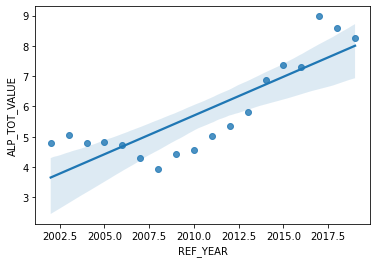

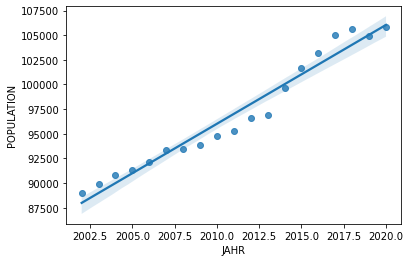

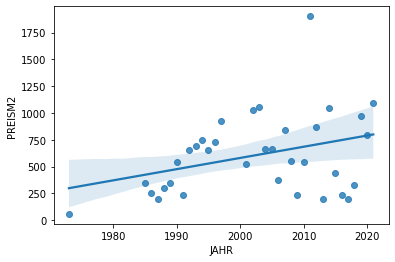

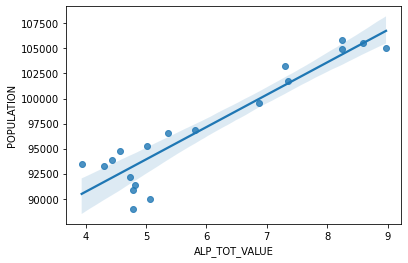

In [296]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot unemployment
unemp_2nd_dist = unemployment_fromDb[unemployment_fromDb['DISTRICT_CODE'] == 90200]
unemp_2nd_dist = unemp_2nd_dist.astype({'ALP_TOT_VALUE': 'double'})
unemp_2nd_dist

sns.regplot(x = "REF_YEAR", 
            y = "ALP_TOT_VALUE", 
            data = unemp_2nd_dist)
plt.show()

# Plot population 
population_2nd_dist = populationGrowth_fromDb[['Jahr', '2. Leopoldstadt']]
population_2nd_dist.columns = ['JAHR', 'POPULATION']

sns.regplot(x = "JAHR", 
            y = "POPULATION", 
            data = population_2nd_dist)
plt.show()

# Plot real estate sold 
realEstate_2nd_dist = realEstateVienna_fromDb[realEstateVienna_fromDb['PLZ'] == 1020]
realEstate_2nd_dist['/m² Gfl.']
realEstate_2nd_dist['Erwerbsdatum'] = pd.to_datetime(realEstate_2nd_dist['Erwerbsdatum'], format = '%d.%m.%Y')
realEstate_2nd_dist['Erwerbsdatum'] = realEstate_2nd_dist['Erwerbsdatum'].dt.year

# Aggregate to median per year 
realEstate_2nd_dist = realEstate_2nd_dist[['Erwerbsdatum','/m² Gfl.']]
realEstate_2nd_dist.columns = ['JAHR', 'PREISM2']
realEstate_2nd_dist = realEstate_2nd_dist.groupby(['JAHR'])['PREISM2'].median().reset_index()

sns.regplot(x = "JAHR", 
            y = "PREISM2", 
            data = realEstate_2nd_dist)
plt.show()

# Set index of time series to year for correlation
population_2nd_dist.set_index('JAHR', inplace=True)
unemp_2nd_dist.set_index('REF_YEAR', inplace=True)

# Correlation Coefficient á la Pearson
merged = pd.merge_asof(population_2nd_dist, unemp_2nd_dist, left_index=True, right_index=True, direction='nearest')
merged = merged[['POPULATION', 'ALP_TOT_VALUE']]
merged.corr()

sns.regplot(x = "ALP_TOT_VALUE", 
            y = "POPULATION", 
            data = merged)
plt.show()

## All Districts

01 District Unemployment


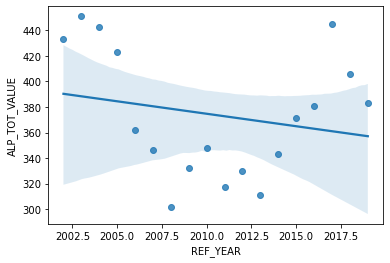

02 District Unemployment


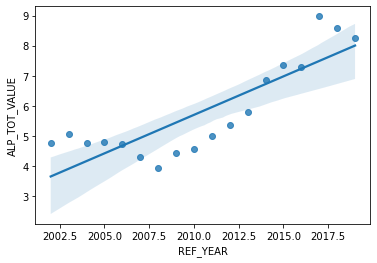

03 District Unemployment


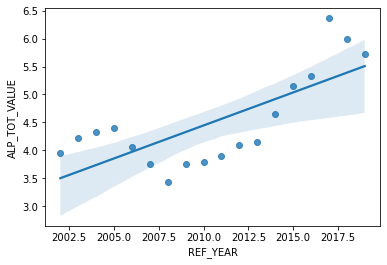

04 District Unemployment


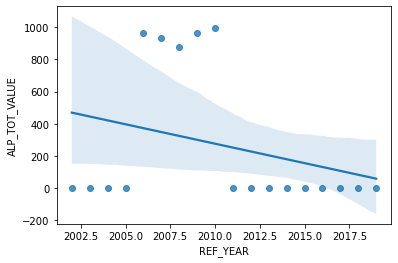

05 District Unemployment


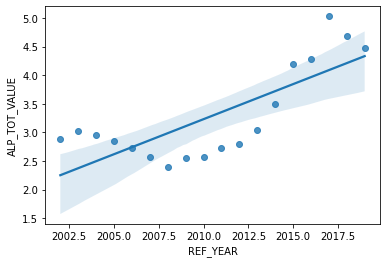

06 District Unemployment


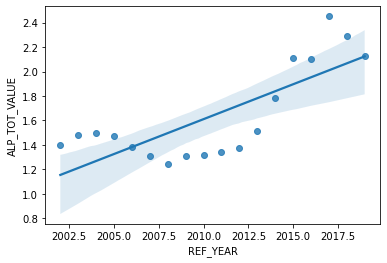

07 District Unemployment


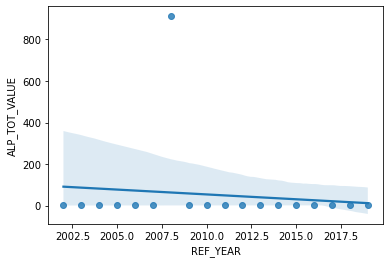

08 District Unemployment


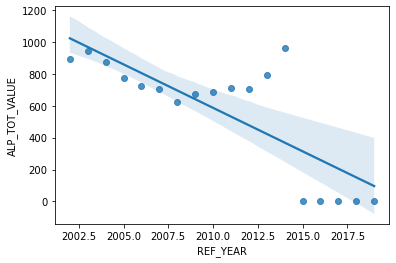

09 District Unemployment


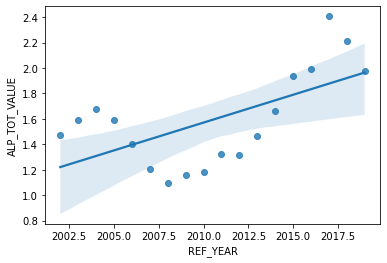

10 District Unemployment


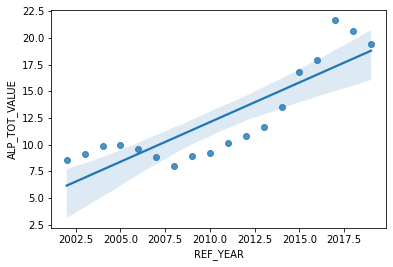

11 District Unemployment


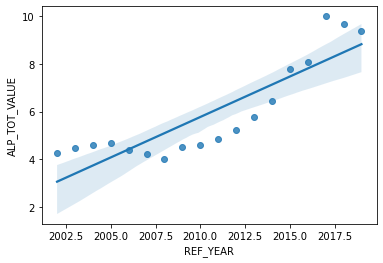

12 District Unemployment


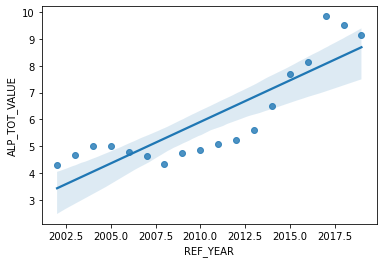

13 District Unemployment


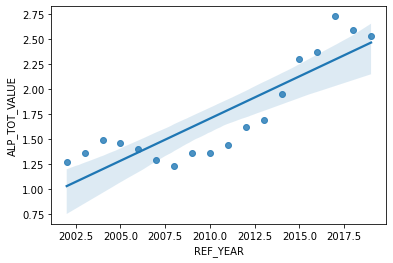

14 District Unemployment


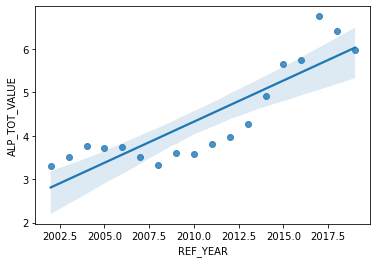

15 District Unemployment


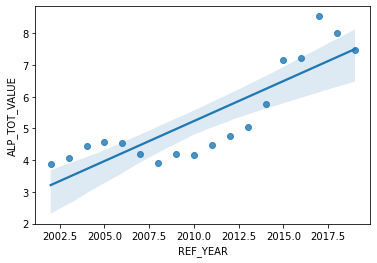

16 District Unemployment


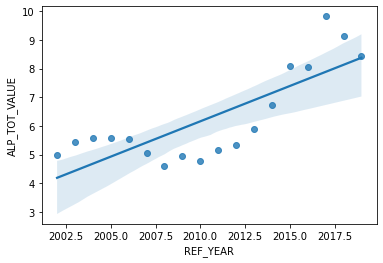

17 District Unemployment


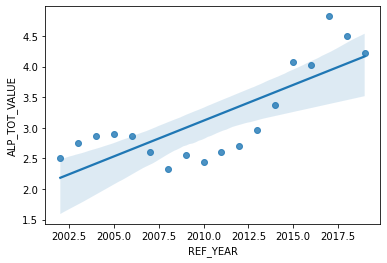

18 District Unemployment


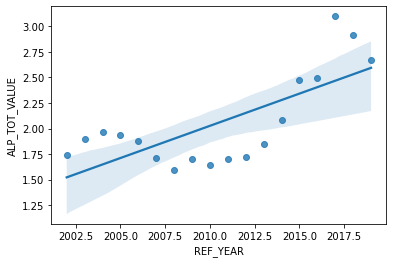

19 District Unemployment


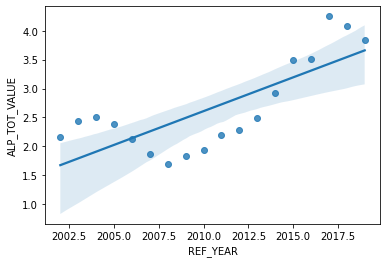

20 District Unemployment


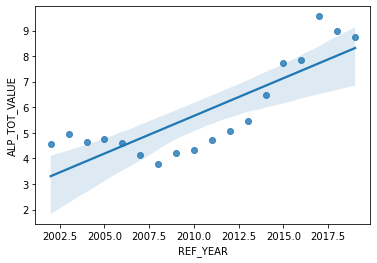

21 District Unemployment


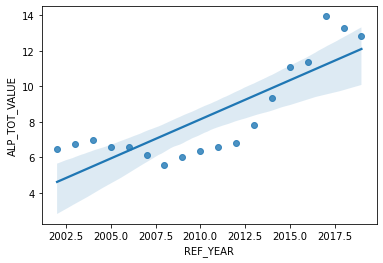

22 District Unemployment


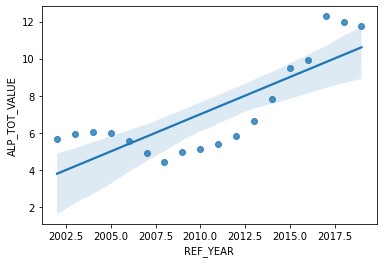

23 District Unemployment


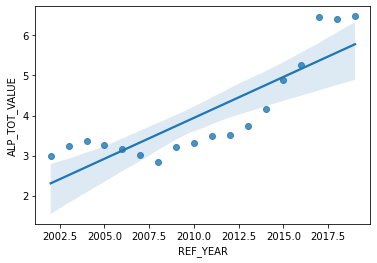

1. Innere Stadt Population Growth


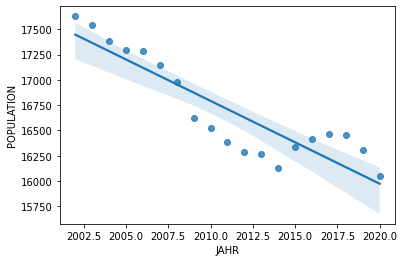

2. Leopoldstadt Population Growth


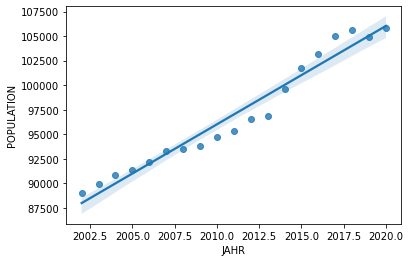

3. Landstrasse Population Growth


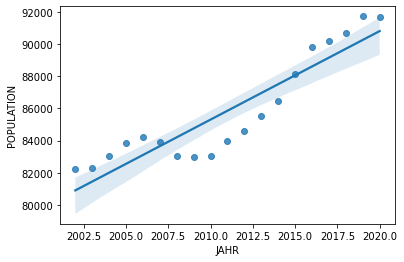

4. Wieden Population Growth


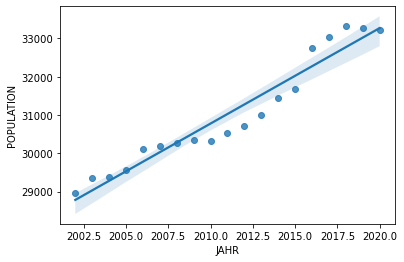

5. Margareten Population Growth


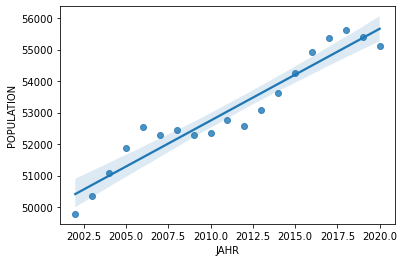

6. Mariahilf Population Growth


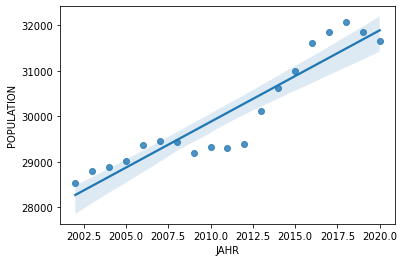

7. Neubau Population Growth


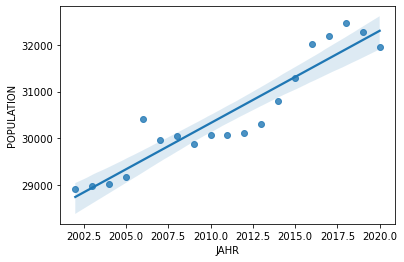

8. Josefstadt Population Growth


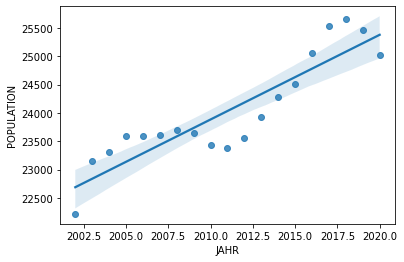

9. Alsergrund Population Growth


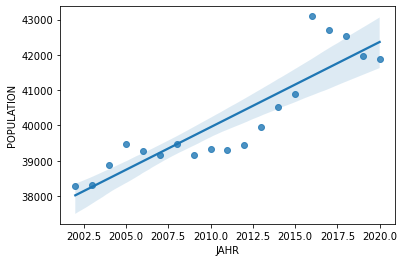

10. Favoriten Population Growth


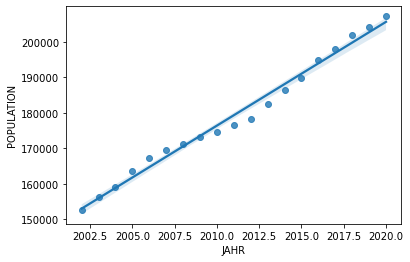

11. Simmering Population Growth


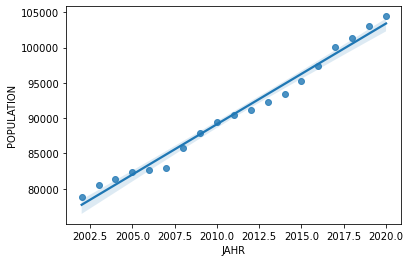

12. Meidling Population Growth


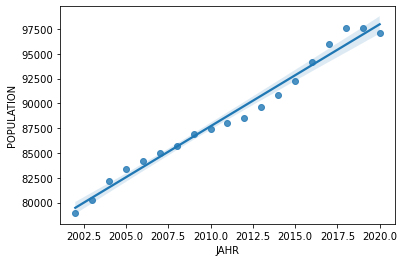

13. Hietzing Population Growth


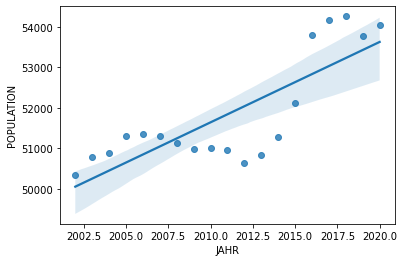

14. Penzing Population Growth


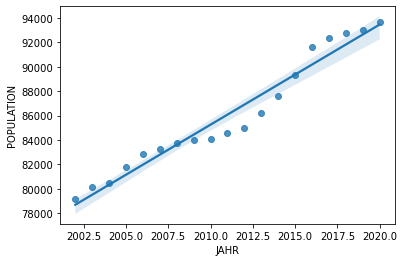

15. Rudolfsheim-Fuenfhaus Population Growth


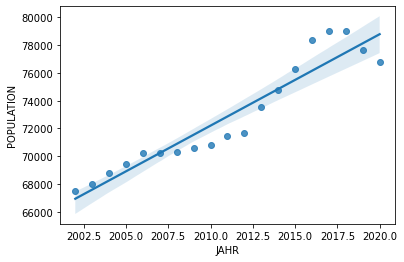

16. Ottakring Population Growth


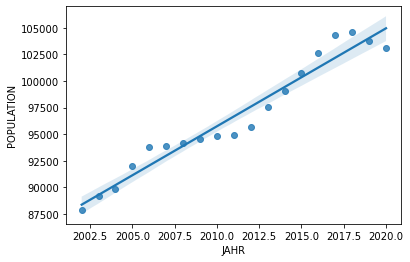

17. Hernals Population Growth


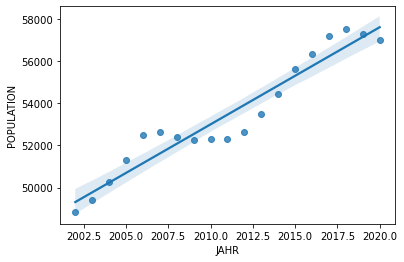

18. Waehring Population Growth


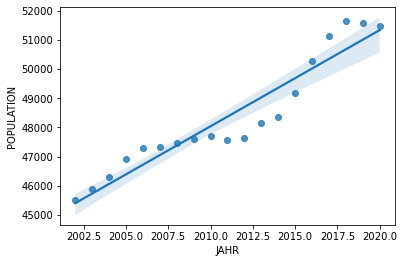

19. Doebling Population Growth


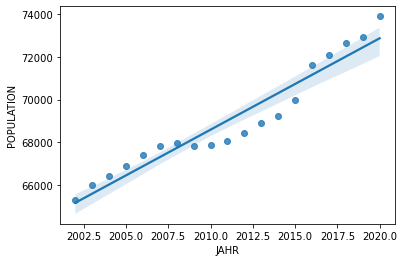

20. Brigittenau Population Growth


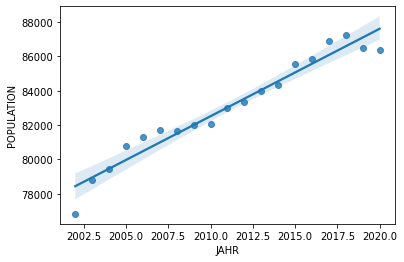

21. Floridsdorf Population Growth


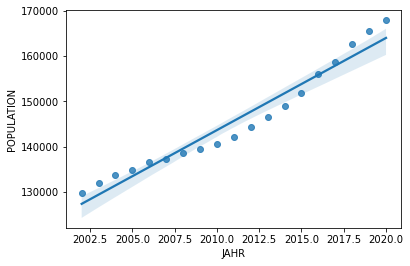

22. Donaustadt Population Growth


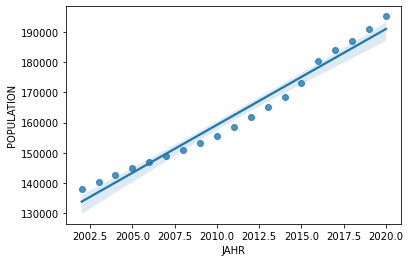

23. Liesing Population Growth


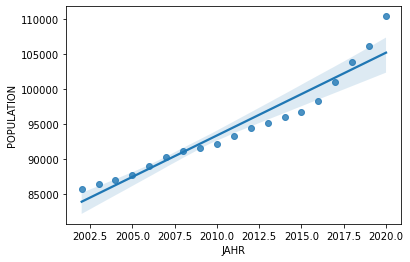

1010 Real Estate Median


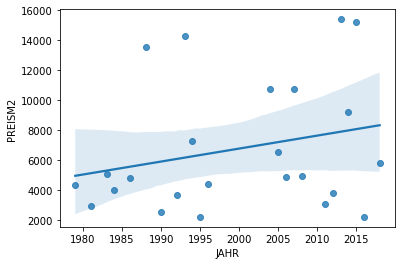

1020 Real Estate Median


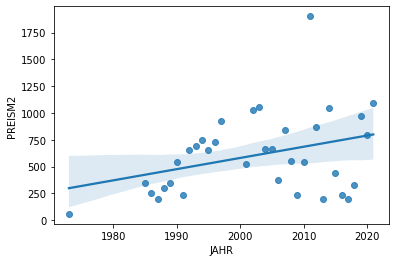

1030 Real Estate Median


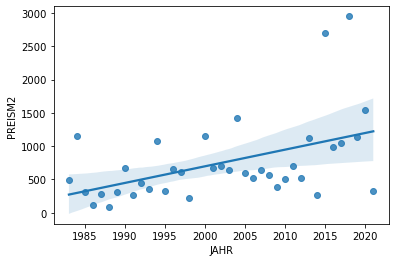

1040 Real Estate Median


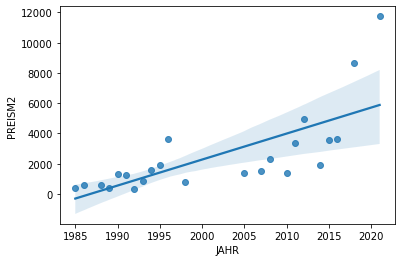

1050 Real Estate Median


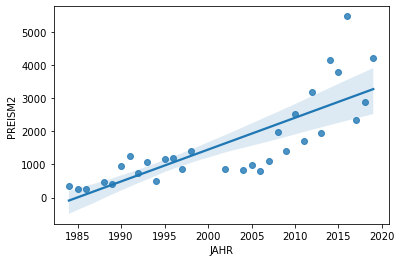

1060 Real Estate Median


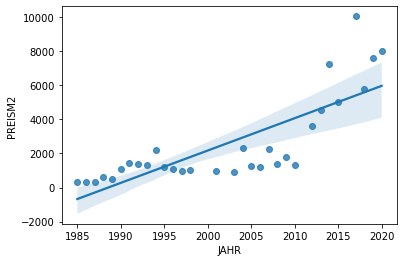

1070 Real Estate Median


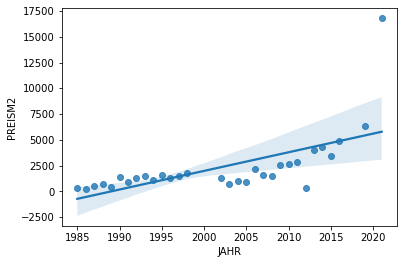

1080 Real Estate Median


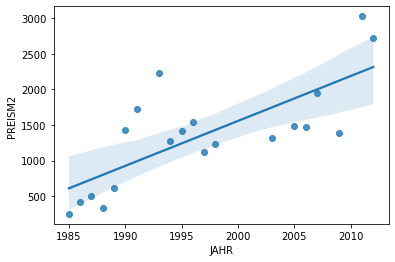

1090 Real Estate Median


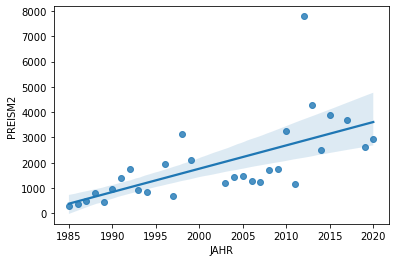

1100 Real Estate Median


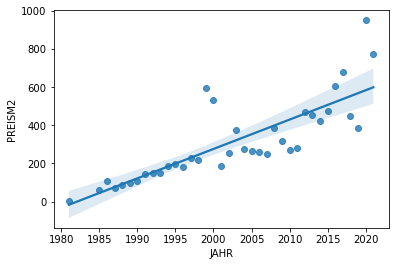

1110 Real Estate Median


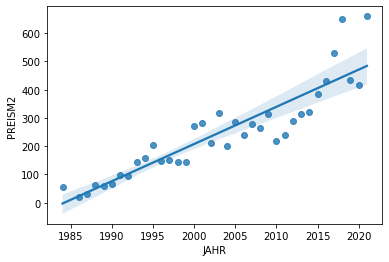

1120 Real Estate Median


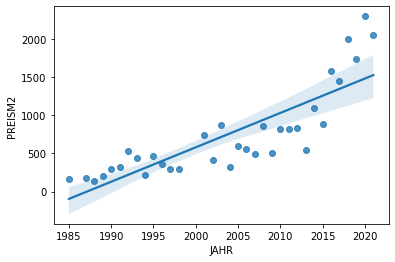

1130 Real Estate Median


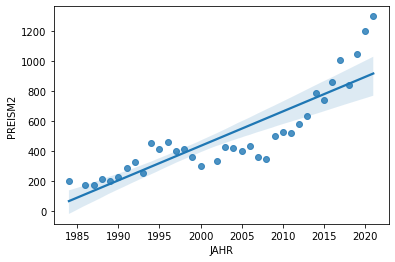

1140 Real Estate Median


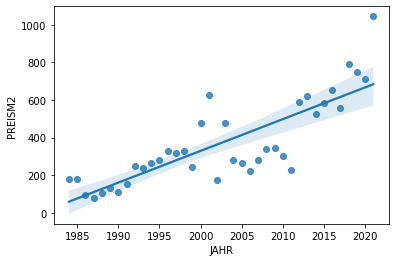

1150 Real Estate Median


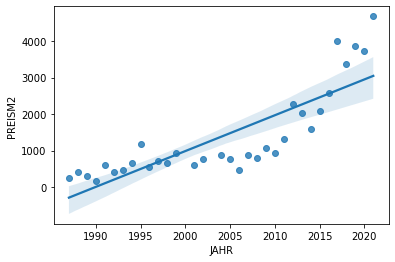

1160 Real Estate Median


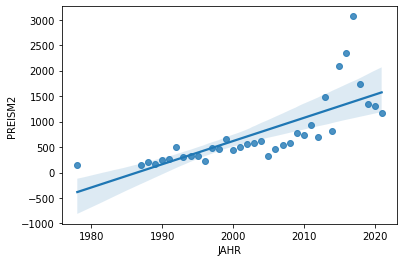

1170 Real Estate Median


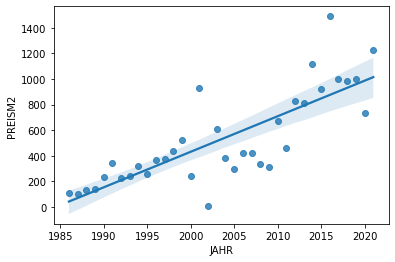

1180 Real Estate Median


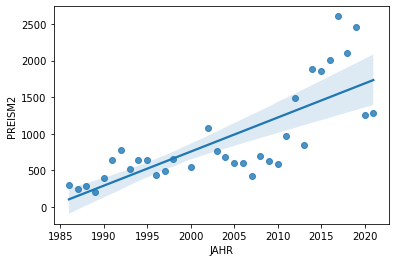

1190 Real Estate Median


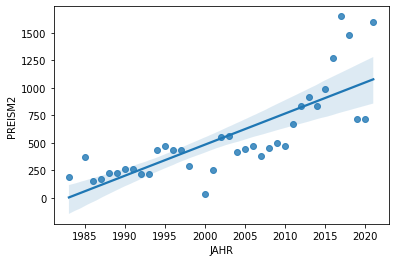

1200 Real Estate Median


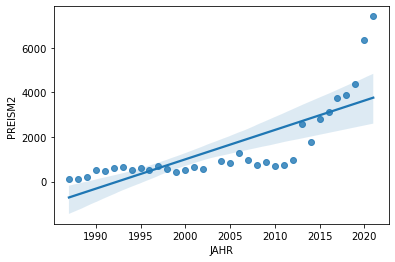

1210 Real Estate Median


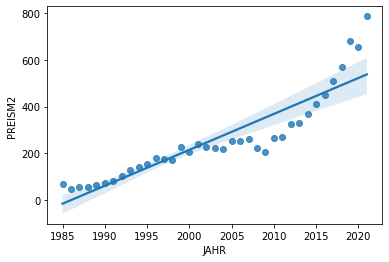

1220 Real Estate Median


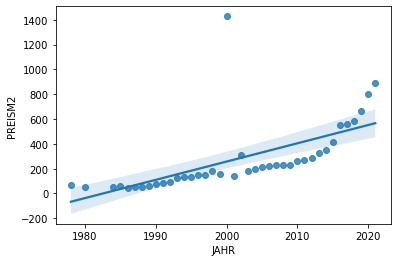

1230 Real Estate Median


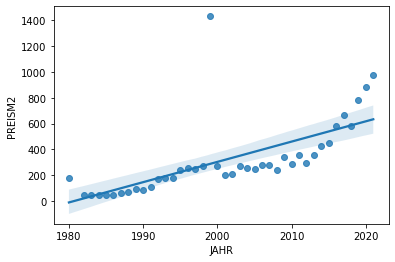

1 District Unemployment Rate x Population Growth Correlation


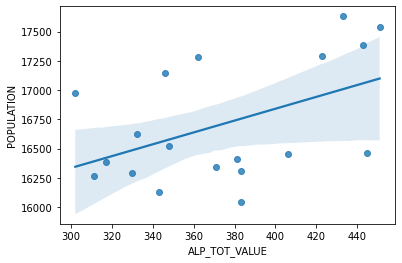

2 District Unemployment Rate x Population Growth Correlation


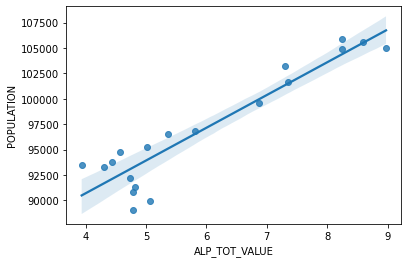

3 District Unemployment Rate x Population Growth Correlation


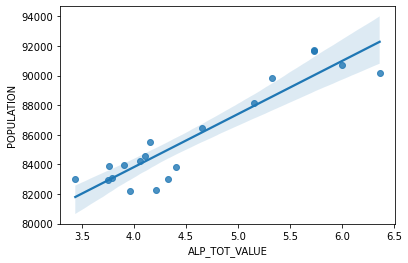

4 District Unemployment Rate x Population Growth Correlation


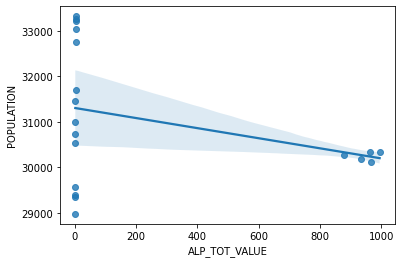

5 District Unemployment Rate x Population Growth Correlation


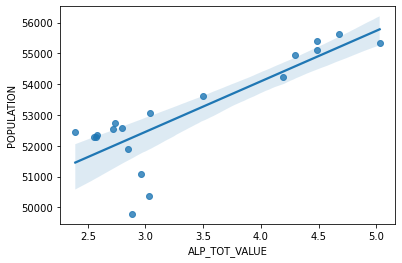

6 District Unemployment Rate x Population Growth Correlation


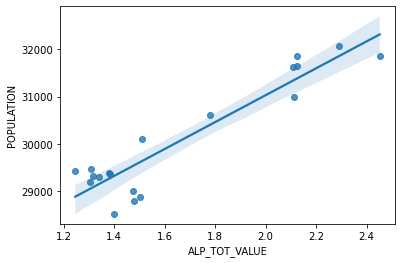

7 District Unemployment Rate x Population Growth Correlation


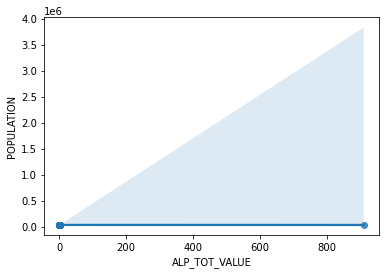

8 District Unemployment Rate x Population Growth Correlation


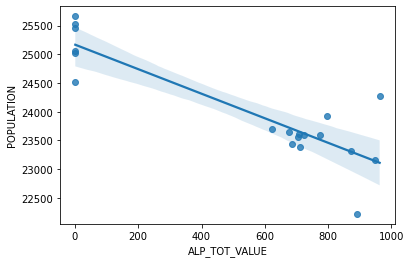

9 District Unemployment Rate x Population Growth Correlation


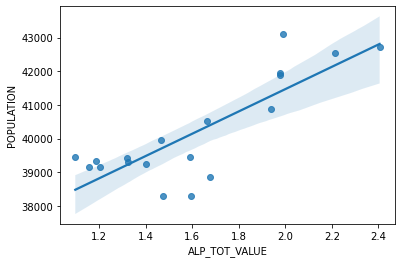

10 District Unemployment Rate x Population Growth Correlation


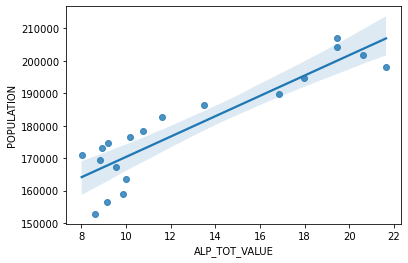

11 District Unemployment Rate x Population Growth Correlation


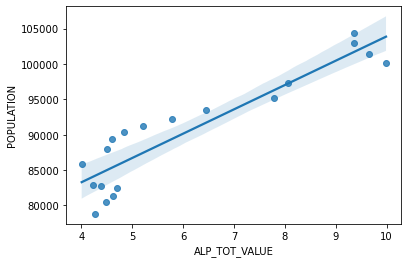

12 District Unemployment Rate x Population Growth Correlation


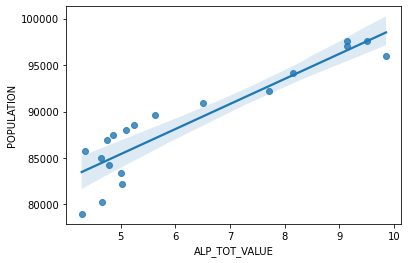

13 District Unemployment Rate x Population Growth Correlation


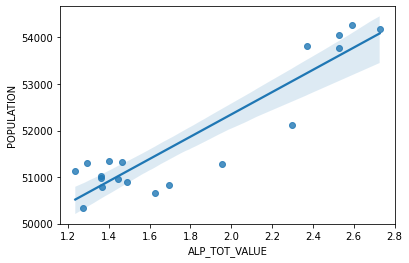

14 District Unemployment Rate x Population Growth Correlation


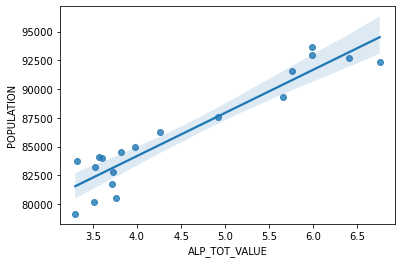

15 District Unemployment Rate x Population Growth Correlation


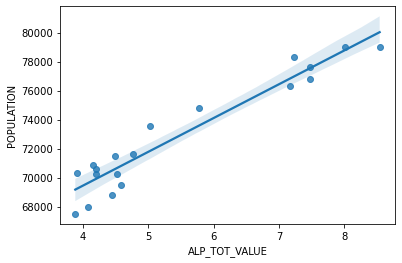

16 District Unemployment Rate x Population Growth Correlation


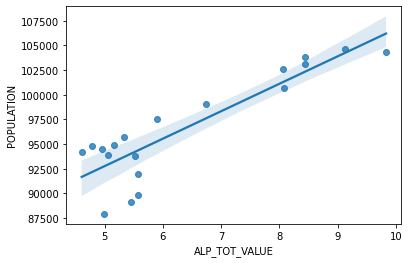

17 District Unemployment Rate x Population Growth Correlation


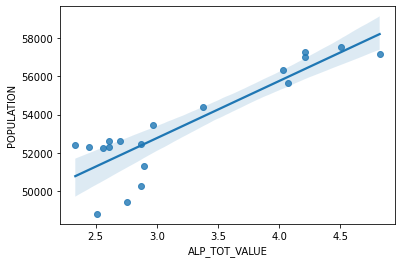

18 District Unemployment Rate x Population Growth Correlation


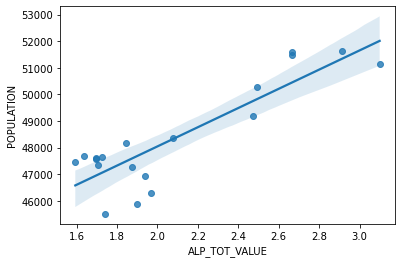

19 District Unemployment Rate x Population Growth Correlation


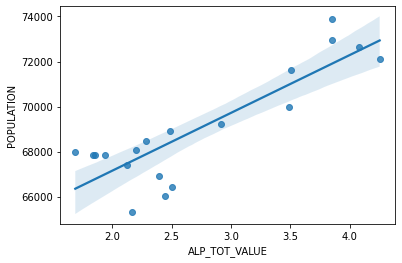

20 District Unemployment Rate x Population Growth Correlation


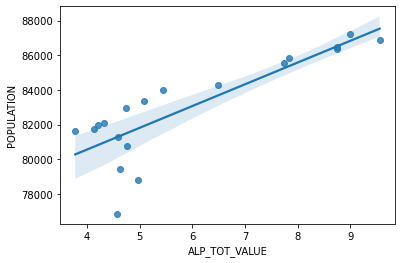

21 District Unemployment Rate x Population Growth Correlation


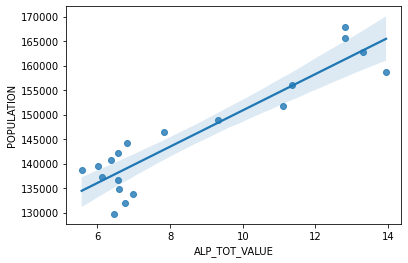

22 District Unemployment Rate x Population Growth Correlation


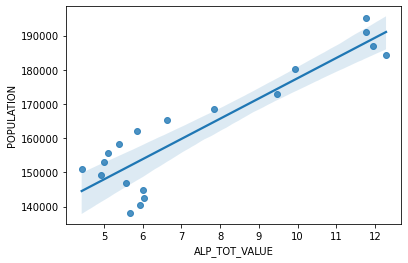

23 District Unemployment Rate x Population Growth Correlation


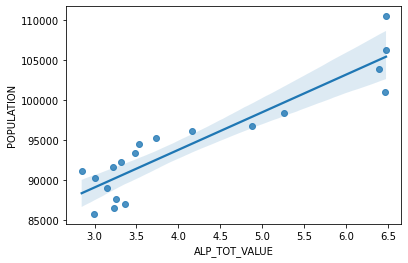

In [318]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot unemployment
unemployment = [0] * 23
i = 0
districts_unemp = [90100, 90200, 90300, 90400, 90500, 90600, 90700, 90800, 90900, 91000, 91100, 91200, 91300, 91400, 91500, 91600, 91700, 91800, 91900, 92000, 92100, 92200, 92300]
for plz in districts_unemp:
    unemp_dist = unemployment_fromDb[unemployment_fromDb['DISTRICT_CODE'] == plz]
    unemp_dist = unemp_dist.astype({'ALP_TOT_VALUE': 'double'})
    unemployment[i] = unemp_dist
    i += 1
    
    print(str(plz)[1:3], 'District Unemployment')
    sns.regplot(x = "REF_YEAR", 
                y = "ALP_TOT_VALUE", 
                data = unemp_dist)
    plt.show()

# Plot population 
population = [0] * 23
i = 0
districts_pop = ['1. Innere Stadt','2. Leopoldstadt','3. Landstrasse','4. Wieden','5. Margareten','6. Mariahilf','7. Neubau','8. Josefstadt','9. Alsergrund','10. Favoriten','11. Simmering','12. Meidling','13. Hietzing','14. Penzing','15. Rudolfsheim-Fuenfhaus','16. Ottakring','17. Hernals','18. Waehring','19. Doebling','20. Brigittenau','21. Floridsdorf','22. Donaustadt','23. Liesing']
for district in districts_pop:
    population_dist = populationGrowth_fromDb[['Jahr', district]]
    population_dist.columns = ['JAHR', 'POPULATION']
    population[i] = population_dist
    i += 1
    print(district, 'Population Growth')
    sns.regplot(x = "JAHR", 
                y = "POPULATION", 
                data = population_dist)
    plt.show()

# Plot real estate sold 
districts_realEstate = [1010, 1020, 1030, 1040, 1050, 1060, 1070, 1080, 1090, 1100, 1110, 1120, 1130, 1140, 1150, 1160, 1170, 1180, 1190, 1200, 1210, 1220, 1230]
for plz in districts_realEstate:
    realEstate_dist = realEstateVienna_fromDb[realEstateVienna_fromDb['PLZ'] == plz]
    realEstate_dist['/m² Gfl.']
    realEstate_dist['Erwerbsdatum'] = pd.to_datetime(realEstate_dist['Erwerbsdatum'], format = '%d.%m.%Y')
    realEstate_dist['Erwerbsdatum'] = realEstate_dist['Erwerbsdatum'].dt.year

    # Aggregate to median per year 
    realEstate_dist = realEstate_dist[['Erwerbsdatum','/m² Gfl.']]
    realEstate_dist.columns = ['JAHR', 'PREISM2']
    realEstate_dist = realEstate_dist.groupby(['JAHR'])['PREISM2'].median().reset_index()

    print(plz, 'Real Estate Median')
    sns.regplot(x = "JAHR", 
                y = "PREISM2", 
                data = realEstate_dist)
    plt.show()

for i in range(0,23):
    # Set index of time series to year for correlation
    population[i].set_index('JAHR', inplace=True)
    unemployment[i].set_index('REF_YEAR', inplace=True)

    # Correlation Coefficient á la Pearson
    merged = pd.merge_asof(population[i], unemployment[i], left_index=True, right_index=True, direction='nearest')
    merged = merged[['POPULATION', 'ALP_TOT_VALUE']]
    merged.corr()

    print(i+1, 'District Unemployment Rate x Population Growth Correlation')
    sns.regplot(x = "ALP_TOT_VALUE", 
                y = "POPULATION", 
                data = merged)
    plt.show()